# <center><b><h1>NeuralNetwork (All Features)</h1></b></center>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, r2_score, recall_score, auc, roc_auc_score, roc_curve
import pandas as pd
from sklearn.externals import joblib
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score
import itertools

from sklearn.neural_network import MLPClassifier

## 1. Prepare the data

In [2]:
df_X_train = pd.read_csv("../Data/X_train.csv", index_col=0)
df_X_train.shape

(6156, 16)

In [3]:
df_y_train = pd.read_csv("../Data/y_train.csv", index_col=0)
df_y_train.shape

(6156, 1)

In [4]:
df_X_val = pd.read_csv("../Data/X_val.csv", index_col=0)
df_X_val.shape

(30777, 16)

In [5]:
df_y_val = pd.read_csv("../Data/y_val.csv", index_col=0)
df_y_val.shape

(30777, 1)

## 2. Finding the best number of layers (between 1 and 2) and the best number of neurons

### 2.1 AUC based

In [6]:
best_score_sl = actual_score = 0
best_i_sl = 0
for i in range(1,32,1):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=200000,verbose=False)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_i_sl = i
    print("I: ", i, "Best_I: ",best_i_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_sl,"Best_Score: ", best_score_sl)

I:  1 Best_I:  1 Best_Score:  0.5 Actual_Score:  0.5
I:  2 Best_I:  2 Best_Score:  0.6384920037378743 Actual_Score:  0.6384920037378743
I:  3 Best_I:  2 Best_Score:  0.6384920037378743 Actual_Score:  0.6185594456897308
I:  4 Best_I:  4 Best_Score:  0.6652486289045142 Actual_Score:  0.6652486289045142
I:  5 Best_I:  5 Best_Score:  0.6671881329295684 Actual_Score:  0.6671881329295684
I:  6 Best_I:  6 Best_Score:  0.6884114658119787 Actual_Score:  0.6884114658119787
I:  7 Best_I:  7 Best_Score:  0.6921960776126578 Actual_Score:  0.6921960776126578
I:  8 Best_I:  7 Best_Score:  0.6921960776126578 Actual_Score:  0.6920630679362036
I:  9 Best_I:  9 Best_Score:  0.7267575745609925 Actual_Score:  0.7267575745609925
I:  10 Best_I:  9 Best_Score:  0.7267575745609925 Actual_Score:  0.7110920954087478
I:  11 Best_I:  9 Best_Score:  0.7267575745609925 Actual_Score:  0.7145528739914693
I:  12 Best_I:  9 Best_Score:  0.7267575745609925 Actual_Score:  0.7124623170739081
I:  13 Best_I:  13 Best_Score: 

In [7]:
best_score_twol = actual_score = 0
best_i_twol = best_j_twol = 0
for i in range(1,32,1):
    for j in range(1,32,1):
        mlp = MLPClassifier(hidden_layer_sizes=(i,j,), max_iter=200000,verbose=False)
        mlp.fit(df_X_train,df_y_train['Class'].values)
        predictions = mlp.predict(df_X_val.values)
        fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
        actual_score = auc(fpr, tpr)
        if actual_score > best_score_twol:
            best_score_twol = actual_score
            best_i_twol = i
            best_j_twol = j
        print("I,J: ", i,"-",j)
    print("Best_I: ", best_i_twol,"Best_J: ", best_j_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_twol,"Best_I: ",best_j_twol,"Best_Score: ", best_score_twol)

I,J:  1 - 1
I,J:  1 - 2
I,J:  1 - 3
I,J:  1 - 4
I,J:  1 - 5
I,J:  1 - 6
I,J:  1 - 7
I,J:  1 - 8
I,J:  1 - 9
I,J:  1 - 10
I,J:  1 - 11
I,J:  1 - 12
I,J:  1 - 13
I,J:  1 - 14
I,J:  1 - 15
I,J:  1 - 16
I,J:  1 - 17
I,J:  1 - 18
I,J:  1 - 19
I,J:  1 - 20
I,J:  1 - 21
I,J:  1 - 22
I,J:  1 - 23
I,J:  1 - 24
I,J:  1 - 25
I,J:  1 - 26
I,J:  1 - 27
I,J:  1 - 28
I,J:  1 - 29
I,J:  1 - 30
I,J:  1 - 31
Best_I:  1 Best_J:  28 Best_Score:  0.5911956332394205 Actual_Score:  0.5
I,J:  2 - 1
I,J:  2 - 2
I,J:  2 - 3
I,J:  2 - 4
I,J:  2 - 5
I,J:  2 - 6
I,J:  2 - 7
I,J:  2 - 8
I,J:  2 - 9
I,J:  2 - 10
I,J:  2 - 11
I,J:  2 - 12
I,J:  2 - 13
I,J:  2 - 14
I,J:  2 - 15
I,J:  2 - 16
I,J:  2 - 17
I,J:  2 - 18
I,J:  2 - 19
I,J:  2 - 20
I,J:  2 - 21
I,J:  2 - 22
I,J:  2 - 23
I,J:  2 - 24
I,J:  2 - 25
I,J:  2 - 26
I,J:  2 - 27
I,J:  2 - 28
I,J:  2 - 29
I,J:  2 - 30
I,J:  2 - 31
Best_I:  2 Best_J:  24 Best_Score:  0.6565849567189536 Actual_Score:  0.5886276159829263
I,J:  3 - 1
I,J:  3 - 2
I,J:  3 - 3
I,J:  3 - 4
I

I,J:  17 - 21
I,J:  17 - 22
I,J:  17 - 23
I,J:  17 - 24
I,J:  17 - 25
I,J:  17 - 26
I,J:  17 - 27
I,J:  17 - 28
I,J:  17 - 29
I,J:  17 - 30
I,J:  17 - 31
Best_I:  16 Best_J:  22 Best_Score:  0.7818469848368969 Actual_Score:  0.7671530525720746
I,J:  18 - 1
I,J:  18 - 2
I,J:  18 - 3
I,J:  18 - 4
I,J:  18 - 5
I,J:  18 - 6
I,J:  18 - 7
I,J:  18 - 8
I,J:  18 - 9
I,J:  18 - 10
I,J:  18 - 11
I,J:  18 - 12
I,J:  18 - 13
I,J:  18 - 14
I,J:  18 - 15
I,J:  18 - 16
I,J:  18 - 17
I,J:  18 - 18
I,J:  18 - 19
I,J:  18 - 20
I,J:  18 - 21
I,J:  18 - 22
I,J:  18 - 23
I,J:  18 - 24
I,J:  18 - 25
I,J:  18 - 26
I,J:  18 - 27
I,J:  18 - 28
I,J:  18 - 29
I,J:  18 - 30
I,J:  18 - 31
Best_I:  16 Best_J:  22 Best_Score:  0.7818469848368969 Actual_Score:  0.7665244921070848
I,J:  19 - 1
I,J:  19 - 2
I,J:  19 - 3
I,J:  19 - 4
I,J:  19 - 5
I,J:  19 - 6
I,J:  19 - 7
I,J:  19 - 8
I,J:  19 - 9
I,J:  19 - 10
I,J:  19 - 11
I,J:  19 - 12
I,J:  19 - 13
I,J:  19 - 14
I,J:  19 - 15
I,J:  19 - 16
I,J:  19 - 17
I,J:  19 - 1

## 3 Find the best random state for both single layer and two layers

In [8]:
best_score_sl = actual_score = 0
best_random_state_sl = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_random_state_sl = i
    print("I: ", i, "Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl)

I:  1 Best_Random_State:  1 Best_Score:  0.7572633863659035 Actual_Score:  0.7572633863659035
I:  2 Best_Random_State:  1 Best_Score:  0.7572633863659035 Actual_Score:  0.7562925479817294
I:  3 Best_Random_State:  3 Best_Score:  0.7622382127731611 Actual_Score:  0.7622382127731611
I:  4 Best_Random_State:  3 Best_Score:  0.7622382127731611 Actual_Score:  0.7429052137903829
I:  5 Best_Random_State:  3 Best_Score:  0.7622382127731611 Actual_Score:  0.7571050595067155
I:  6 Best_Random_State:  3 Best_Score:  0.7622382127731611 Actual_Score:  0.7429218399999397
I:  7 Best_Random_State:  3 Best_Score:  0.7622382127731611 Actual_Score:  0.7596965754542734
I:  8 Best_Random_State:  3 Best_Score:  0.7622382127731611 Actual_Score:  0.7508695224196879
I:  9 Best_Random_State:  3 Best_Score:  0.7622382127731611 Actual_Score:  0.7534256132048379
I:  10 Best_Random_State:  3 Best_Score:  0.7622382127731611 Actual_Score:  0.7452209566569832
I:  11 Best_Random_State:  3 Best_Score:  0.762238212773161

I:  87 Best_Random_State:  38 Best_Score:  0.7713952630039632 Actual_Score:  0.738921441726647
I:  88 Best_Random_State:  38 Best_Score:  0.7713952630039632 Actual_Score:  0.7649649111404673
I:  89 Best_Random_State:  38 Best_Score:  0.7713952630039632 Actual_Score:  0.7531498401238804
I:  90 Best_Random_State:  38 Best_Score:  0.7713952630039632 Actual_Score:  0.7549982306312216
I:  91 Best_Random_State:  38 Best_Score:  0.7713952630039632 Actual_Score:  0.7616393149774942
I:  92 Best_Random_State:  38 Best_Score:  0.7713952630039632 Actual_Score:  0.7509338545146205
I:  93 Best_Random_State:  38 Best_Score:  0.7713952630039632 Actual_Score:  0.7659151320801202
I:  94 Best_Random_State:  38 Best_Score:  0.7713952630039632 Actual_Score:  0.7607606528659051
I:  95 Best_Random_State:  38 Best_Score:  0.7713952630039632 Actual_Score:  0.7534588656239515
I:  96 Best_Random_State:  38 Best_Score:  0.7713952630039632 Actual_Score:  0.7577390282131661
I:  97 Best_Random_State:  38 Best_Score:

In [9]:
best_score_twol = actual_score = 0
best_random_state_twol = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_twol:
        best_score_twol = actual_score
        best_random_state_twol = i
    print("I: ", i, "Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol)

I:  1 Best_Random_State:  1 Best_Score:  0.768808801046242 Actual_Score:  0.768808801046242
I:  2 Best_Random_State:  1 Best_Score:  0.768808801046242 Actual_Score:  0.7635422838517183
I:  3 Best_Random_State:  3 Best_Score:  0.7726686086583254 Actual_Score:  0.7726686086583254
I:  4 Best_Random_State:  3 Best_Score:  0.7726686086583254 Actual_Score:  0.765041523958368
I:  5 Best_Random_State:  3 Best_Score:  0.7726686086583254 Actual_Score:  0.759463808520479
I:  6 Best_Random_State:  3 Best_Score:  0.7726686086583254 Actual_Score:  0.762758325007633
I:  7 Best_Random_State:  3 Best_Score:  0.7726686086583254 Actual_Score:  0.772157895900279
I:  8 Best_Random_State:  3 Best_Score:  0.7726686086583254 Actual_Score:  0.7653755123895492
I:  9 Best_Random_State:  3 Best_Score:  0.7726686086583254 Actual_Score:  0.7651528534354284
I:  10 Best_Random_State:  3 Best_Score:  0.7726686086583254 Actual_Score:  0.7452025119557562
I:  11 Best_Random_State:  11 Best_Score:  0.7814031311687016 Actu

I:  88 Best_Random_State:  48 Best_Score:  0.789847427131858 Actual_Score:  0.7855741370241502
I:  89 Best_Random_State:  48 Best_Score:  0.789847427131858 Actual_Score:  0.7816930034642974
I:  90 Best_Random_State:  48 Best_Score:  0.789847427131858 Actual_Score:  0.7587799611853581
I:  91 Best_Random_State:  48 Best_Score:  0.789847427131858 Actual_Score:  0.7800394277334244
I:  92 Best_Random_State:  48 Best_Score:  0.789847427131858 Actual_Score:  0.7847374183048521
I:  93 Best_Random_State:  48 Best_Score:  0.789847427131858 Actual_Score:  0.7868182214943638
I:  94 Best_Random_State:  48 Best_Score:  0.789847427131858 Actual_Score:  0.7504759016317869
I:  95 Best_Random_State:  48 Best_Score:  0.789847427131858 Actual_Score:  0.76966866420498
I:  96 Best_Random_State:  48 Best_Score:  0.789847427131858 Actual_Score:  0.7719132024951406
I:  97 Best_Random_State:  48 Best_Score:  0.789847427131858 Actual_Score:  0.78612967442103
I:  98 Best_Random_State:  48 Best_Score:  0.789847427

## 4. Compute metrics on the best architecture

In [10]:
if best_score_sl > best_score_twol:
    best_architecture = "Two Layers"
    best_neurons = [best_i_sl]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=best_random_state_sl)
    mlp.fit(df_X_train,df_y_train['Class'].values)
else:
    best_architecture = "Two Layers"
    best_neurons = [best_i_twol, best_j_twol]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=best_random_state_twol)
    mlp.fit(df_X_train,df_y_train['Class'].values)

predictions = mlp.predict(df_X_val.values)
print("The best architecture is : ", best_architecture)
layer = 0
for neuron in best_neurons:
    layer += 1
    print("For the layer ", layer, " the best number of neurons is : ", neuron)

The best architecture is :  Two Layers
For the layer  1  the best number of neurons is :  31
For the layer  2  the best number of neurons is :  21


### 4.3 Confusion Matrix

In [11]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions)
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)

[[25165  4908]
 [  181   523]]


### 4.2 Accuracy

In [12]:
accuracy = (tp + tn) / float(tp+tn+fp+fn)
print("Accuracy : ",accuracy)

Accuracy :  0.8346492510641064


### 4.3 Recall (or Sensitivity)

In [13]:
recall = tp/(tp+fn)
print("Recall : ", recall)

Recall :  0.7428977272727273


### 4.4 Error

In [14]:
classification_error = (fp + fn) / float(tp+tn+fp+fn)
print("Error : ",classification_error)

Error :  0.1653507489358937


### 4.5 Specificity

In [15]:
specificity = tn / (tn+fp)

print(specificity)

0.8367971269909886


### 4.6 False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [16]:
false_positive_rate = fp / float(tn+fp)

print(false_positive_rate)
print(1 - specificity)

0.1632028730090114
0.16320287300901137


### 4.7 Precision: When a positive value is predicted, how often is the prediction correct?

In [17]:
precision = tp / float(tp+fp)

print(precision)

0.09629902412078807


## 5 Metrics visualization

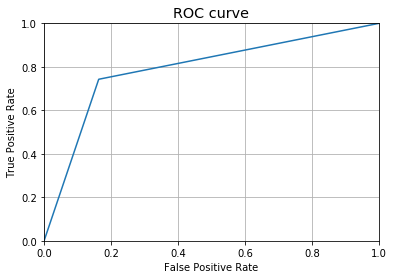

In [18]:
fpr, tpr, thresholds = roc_curve(df_y_val, predictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)